In [1]:
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#Importing File into Pandas Dataframe

df=pd.read_csv("Subject1_Brain_Frequencies_Attention_Wavelet.csv")

#df=pd.read_csv("Subject3_Brain_Frequencies_Attention_Wavelet.csv") for Subject 1
#df=pd.read_csv("Subject2_Brain_Frequencies_Attention_Wavelet.csv") for Subject 2
#df=pd.read_csv("Subject3_Brain_Frequencies_Attention_Wavelet.csv") for Subject 3

df=df.dropna() #Dropping NaN Values

In [3]:
#Attention values will be divided into 3 stages. 
#1st Stage: Low Attention (0 to 33.33....) denoted by 1
#2nd Stage: Mid Attention (33.33 to 66.66...) denoted by 2
#3rd Stage: High Attention (66.66 to 100) denoted by 3

Max=df['Attention'].max()
Min=df['Attention'].min()
Z=(Max-Min)/3

df.loc[df['Attention'] < Z,'Attention_lvl'] = 0
df.loc[(df['Attention'] > Z) & (df['Attention'] < Z*2), 'Attention_lvl'] = 1
df.loc[df['Attention'] >Z*2,'Attention_lvl'] = 2

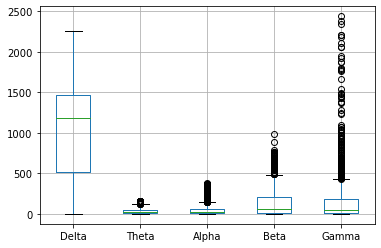

In [4]:
#Power of Brain Waves and Boxplots

df['Delta']=df.Delta**2
df['Theta']=df.Theta**2
df['Alpha']=df.Alpha**2
df['Beta']=df.Beta**2
df['Gamma']=df.Gamma**2

boxplot = df.boxplot(column=['Delta', 'Theta', 'Alpha','Beta','Gamma'])


In [5]:
df

,Delta,Theta,Alpha,Beta,Gamma,Attention,Attention_lvl
0,2260.572358,8.498578,25.676086,43.011185,79.659907,56.0,1.0
1,2259.020375,8.412421,27.965568,44.987786,76.833152,40.0,1.0
2,2257.399797,8.321077,30.310837,46.888508,69.503169,47.0,1.0
3,2255.709821,8.224557,32.700023,48.697392,58.404279,47.0,1.0
4,2253.949414,8.122848,35.118107,50.384597,45.096948,44.0,1.0
...,...,...,...,...,...,...,...
1195,3.197945,5.114631,70.544554,576.828336,18.315703,26.0,0.0
1196,4.164081,3.511845,60.476344,681.155311,11.895605,38.0,1.0
1197,5.258333,2.190727,50.997287,785.883689,6.769513,29.0,0.0
1198,6.481047,1.166702,42.192167,888.130271,3.150847,41.0,1.0


In [6]:
#Selecting Input and Output for Train_Test

X=df.drop(['Attention','Attention_lvl'],axis='columns')
y=df.Attention_lvl

In [7]:
#Importing Machine Learning Models

from sklearn.svm import SVC
model2 = SVC()

from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()

from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=50)

In [8]:
#Splitting the Dataset into 70% TRAIN AND 30% TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [9]:
#SVM Classifier
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.5944444444444444

In [10]:
#Logistic Regression
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

C:\Users\RAIAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5944444444444444

In [11]:
#Random Forest Classifier
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.7638888888888888

In [12]:
#Calculating Brain Wave Power Ratios

df['TBR']=df.Theta/df.Beta
df['TAR']=df.Theta/df.Alpha
df['DAR']=df.Delta/df.Alpha
df['ABR']=df.Alpha/df.Beta
df['DTABR']=(df.Delta+df.Theta)/(df.Alpha+df.Beta)

In [13]:
data= [df.TBR,df.TAR,df.DAR,df.ABR,df.DTABR]
headers = ["TBR", "TAR","DAR","ABR"]
ndf = pd.concat(data, axis=1, keys=headers)
ndf


,TBR,TAR,DAR,ABR
0,0.197590,0.330992,88.041939,0.596963
1,0.186993,0.300814,80.778634,0.621626
2,0.177465,0.274525,74.475007,0.646445
3,0.168891,0.251515,68.981903,0.671494
4,0.161217,0.231301,64.181974,0.697001
...,...,...,...,...
1195,0.008867,0.072502,0.045332,0.122297
1196,0.005156,0.058070,0.068855,0.088785
1197,0.002788,0.042958,0.103110,0.064892
1198,0.001314,0.027652,0.153608,0.047507


In [14]:
X2=ndf

In [15]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y,test_size=0.3)

In [16]:
#SVM Classifier
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.5944444444444444

In [17]:
#Logistic Regression
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

C:\Users\RAIAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5944444444444444

In [18]:
#Random Forest Classifier
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.7638888888888888